In [1]:
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Exercise 1

In [2]:
#I am not adding some markdown cells with LaTeX notation because it bugs the notebook

## Write the R probability functions for the probability density and cumulative distribution functions, following the R naming convention

In [3]:
#probability density 
dp = function(k){
    if (k %in% 1:5) {
        return( k/15)}
    else{return(0)}
    }

#cumulative probability
cp = function(k){
    ifelse(k>0,max(cumsum(sapply(1:k,dp))),0)
    }

## Produce two plots showing the pdf and cdf, separately

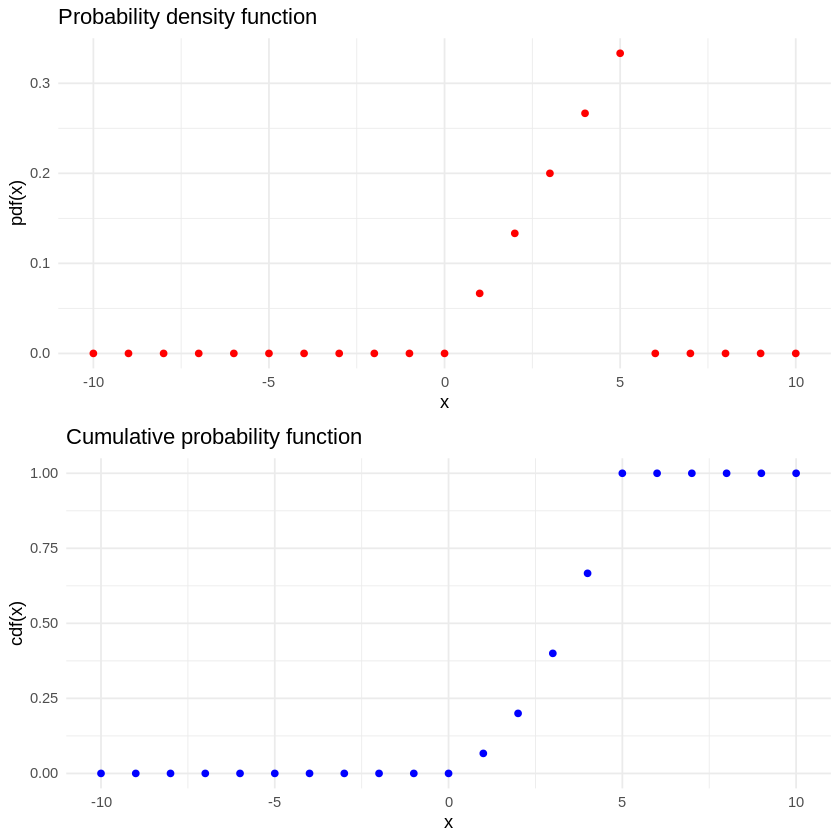

In [4]:
x    = seq(-10,10,1)
y_dp = sapply(x,dp)
y_cp = sapply(x,cp)

#pdf
data_dp = data.frame(x,y_dp)
pdf_plot = ggplot(data_dp,aes(x,y_dp)) + 
                geom_point(color="red") +
                labs(y="pdf(x)",title = "Probability density function") +
                theme_minimal()

#cdf
data_cp = data.frame(x,y_cp)
cdf_plot = ggplot(data_cp,aes(x,y_cp)) + 
                    geom_point(color="blue") +
                    labs(y="cdf(x)",title = "Cumulative probability function") +
                    theme_minimal()
grid.arrange(pdf_plot,cdf_plot,nrow=2)               

## Compute, using R, the mean value and variance of the probability distribution

In [5]:
x        = 1:100000
y        = sapply(x,dp)

#applying the definitions
mean     = sum(x*y)
variance = sum((x**2) * y)

cat("The mean is:",mean,"\n","The variance is:", variance,"\n")

The mean is: 3.666667 
 The variance is: 15 


## Compute, using R, the expected value $\mathbb{E}$ [k (6 − k)]

In [6]:
k = x
y = sapply(k,dp)
expected_value = sum(k*(6-k) * y)
cat("The expected value of k(6-k) is:",expected_value)

The expected value of k(6-k) is: 7

## Write the R function that allows to sample random numbers from the probability distribution


In [7]:
rp = function(number_of_elements_to_sample){
    
    #simpler notation
    n = number_of_elements_to_sample
    
    #extract n numbers from uniform distribution
    uniform_range = runif(n)
    
    check_one_by_one = function(u){
        #x is the interesting range of the distribution 
        x = 0:5
        #
        # tell me the min x such that the cdf computed at x has a value bigger than u
        #
        # For example :
        # sapply(x,cp) = [0,0.07,0.2, 0.4, 0.67,1]
        # if u = .5 I should extract number 4 since cdf(3) = .4 <u  and cdf(4) = .67 > u
        extracted_number = min(x[sapply(x,cp) >=u])

        return(extracted_number)
        }
    extracted_range = sapply(uniform_range,check_one_by_one)
    return(extracted_range)
    }

## Using the implemented function (point (5)), sample $10^5$ random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

In [8]:
x    = seq(-10,10,1)
y_dp = sapply(x,dp)
y_cp = sapply(x,cp)

In [9]:
n = 1e5
sampled_numbers = rp(n)

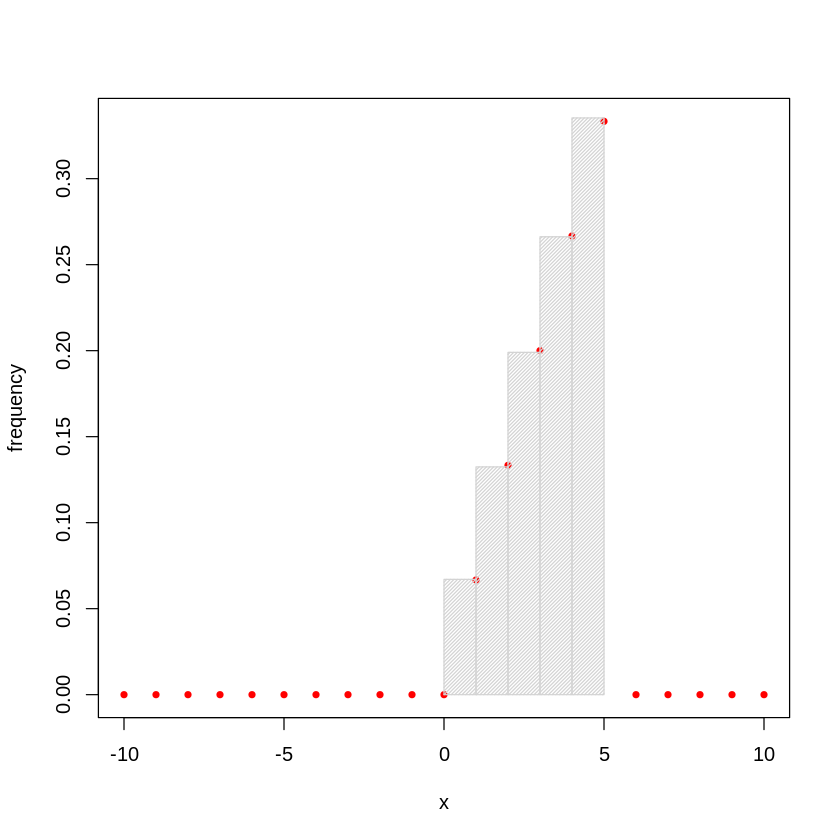

In [10]:
plot(x,y_dp,col="red",pch=20,xlab="x",ylab="frequency")
hist(sampled_numbers,add=TRUE,probability = TRUE,breaks=0:5,density=50)

# Exercise 2 - Triangular distribution

## Plot the function, given the interval (a, b)

In [11]:
dtriangular = function(x,a = -1,b =1, c= 0){
    
     #constraint on interval definition
        if(c < a | c>b){
            return(cat("Error: c must be between a and b"))}
    
    non_normalized_dtriangular = function(x){
        #ifelse is necessary for the integrate function, otherwise it will raise an error
        ifelse(x>=a & x<c,2*(x-a)/((b-a)*(c-a)),
               ifelse(x>=c & x<= b,2*(b-x)/((b-a)*(b-c)),0)
                   )
            }
    
    #normalized triangular function
    normalized_dtriangular   = function(x){
        
        normalization_factor = integrate(non_normalized_dtriangular,a,b)$value  
        
        normalized_prob      = non_normalized_dtriangular(x) / normalization_factor
        return(normalized_prob)}
    
    normalized_prob = normalized_dtriangular(x)
   
    return(normalized_prob)

    }



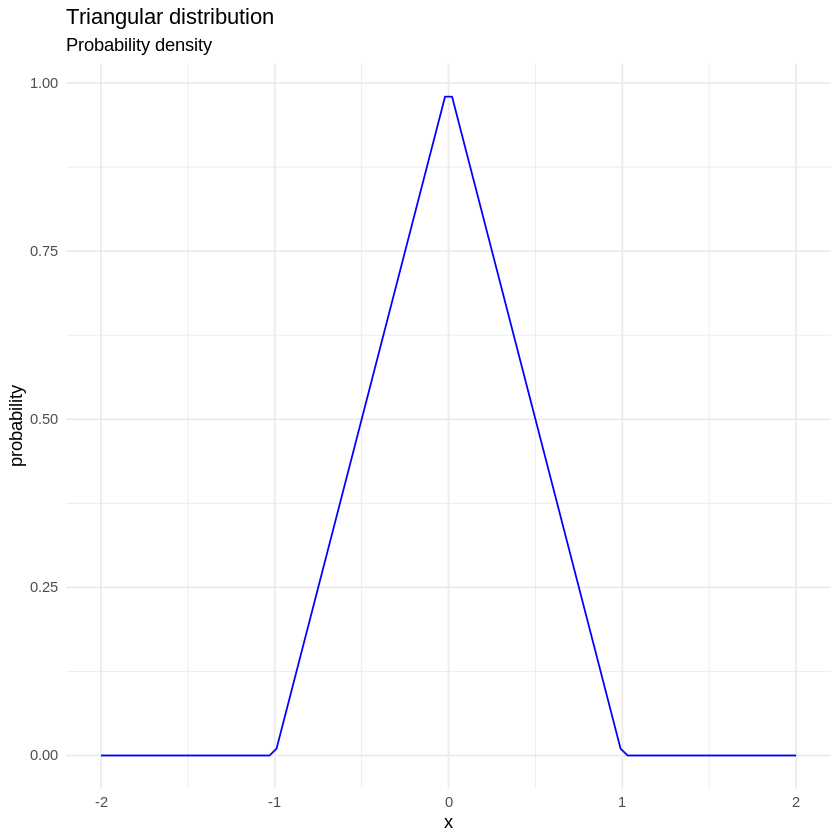

In [12]:
x=seq(-2,2,length.out = 100)
y = sapply(x,dtriangular)
ggplot(data.frame(x,y),aes(x,y)) +
        geom_line(color="blue") +
        labs(y="probability",title = "Triangular distribution",subtitle = "Probability density")+
        theme_minimal()


##  Write an algorithm to generate random numbers from the triangular distribution


In [13]:
#compute cumulative
#
#you want to compute the integral

ctriangular = function(x,a=-1,b=1,c=0){
    return(integrate(dtriangular,a,x)$value)}

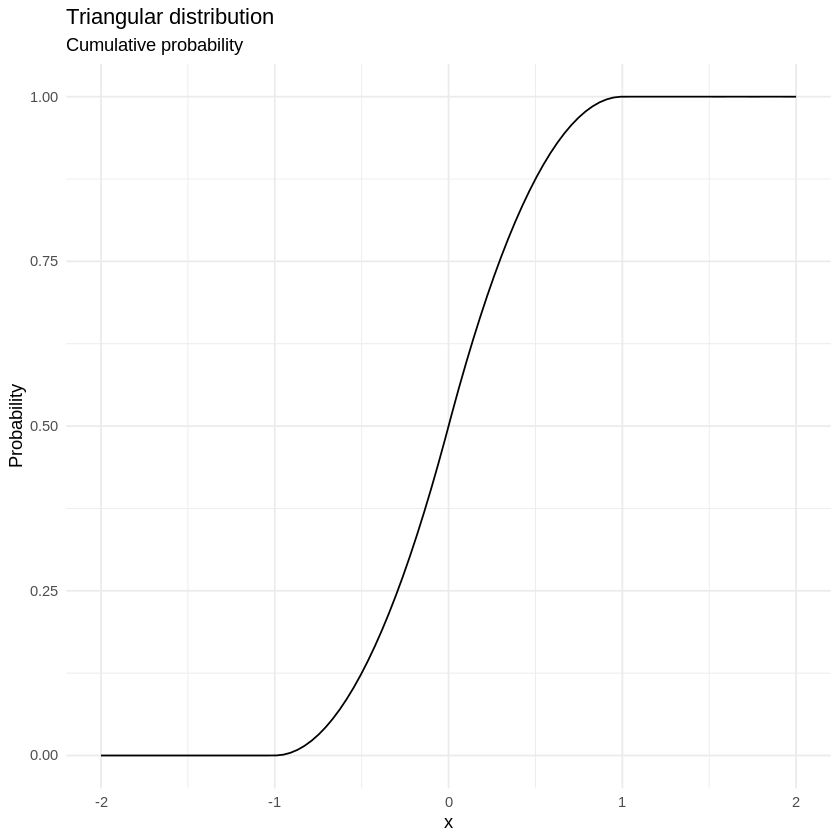

In [14]:
#just to check if everything is ok
y = sapply(x,ctriangular)

ggplot(data.frame(x,y),aes(x,y))+
geom_line()+
labs(y="Probability",title="Triangular distribution",subtitle = "Cumulative probability")+
theme_minimal()

In [15]:
#generate random numbers.
#hit or miss method

rtriangular = function(how_many_numbers_to_sample){
    n = how_many_numbers_to_sample
    #probability is non-zero in interval [-1,1] so these are the only possible values to be sampled
    x_axis_random_numbers = runif(n,min=-1,max=1)
    #Now I need values to compare with
    y_axis_random_numbers = runif(n)
    #hit or miss
    sampled = x_axis_random_numbers[y_axis_random_numbers < sapply(x_axis_random_numbers,dtriangular)]
    return(sampled)
    }

## Generate 10**4 random number from the distribution, show them in an histogram and superimpose the analytical curve

In [16]:
sampled_triangular = rtriangular(1e4)

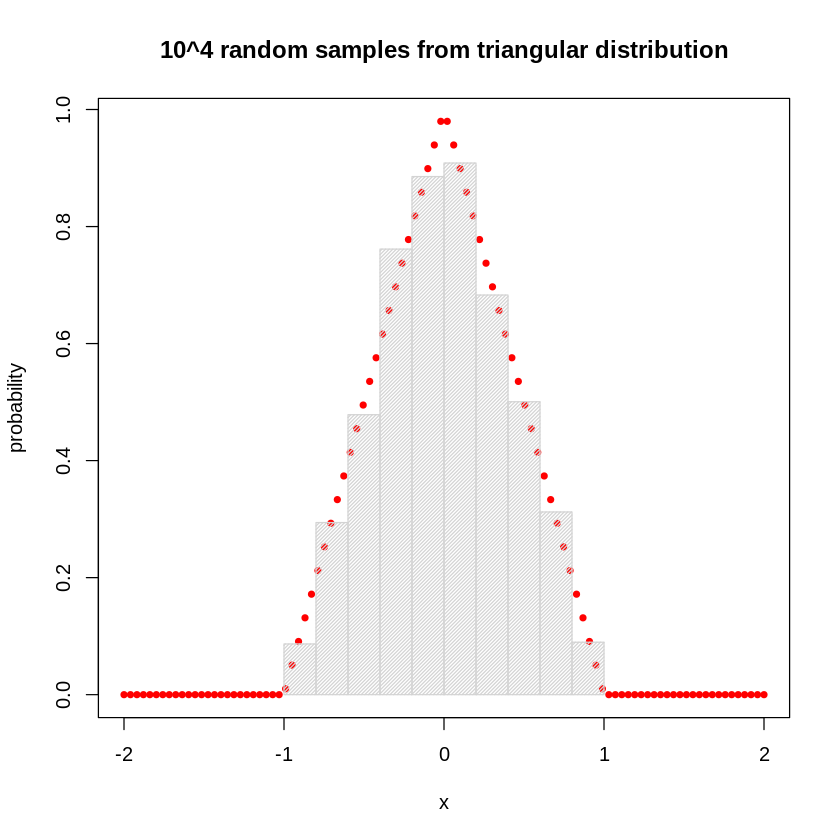

In [17]:
x = (seq(-2,2,length.out = 100))
y = sapply(x,dtriangular)
plot(x,y,col="red",pch=20,ylab = "probability",main="10^4 random samples from triangular distribution")
hist(sampled_triangular,add=TRUE,probability = TRUE,density = 50)

# Exercise 3

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30

## Simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram


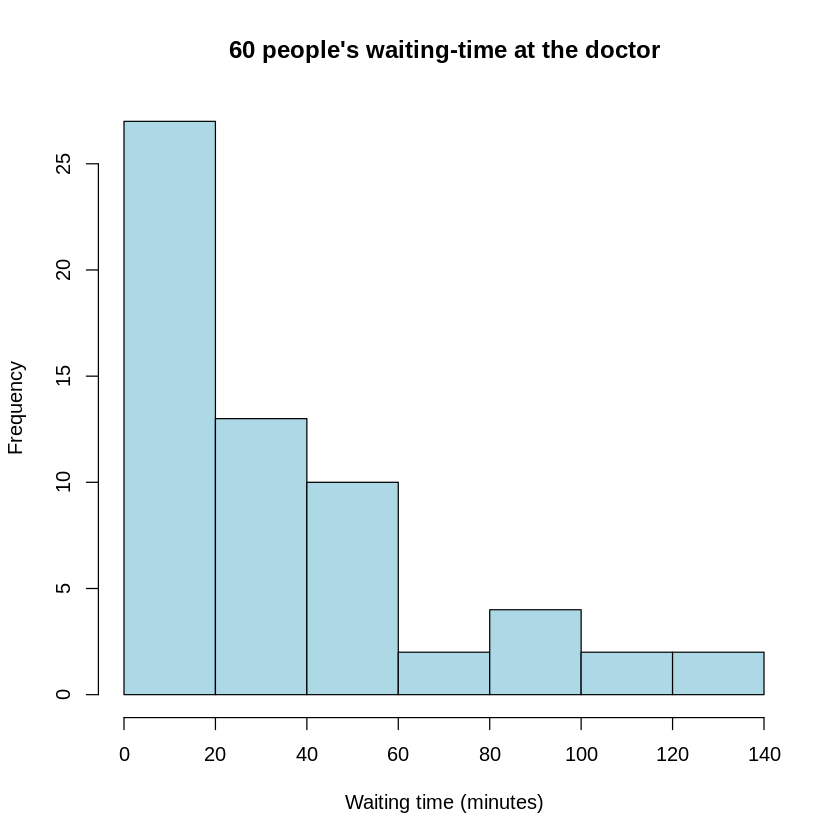

In [18]:
set.seed(2)
lambda = 1/30 #minutes

#you want to SAMPLE from a distribution
#so generate 60 random numbers and then apply inverse transform

#sample from unifrom distribution
patients = runif(60) #60 people

#quantile function is the inverse of the cumulative
waiting_times = qexp(patients,rate=lambda)
hist(waiting_times,main="60 people's waiting-time at the doctor",col="lightblue",xlab="Waiting time (minutes)")

## What is the probability that a person will wait for less than 12 minutes ?

In [19]:
#cumulative distribution

cat("The probabilty of waiting less that 12 minutes is:",round(pexp(12,rate=lambda)*100,2),"%")

The probabilty of waiting less that 12 minutes is: 32.97 %

## Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)


In [20]:
mean_data = mean(waiting_times)
cat("Mean waiting time from simulation:", round(mean_data),"minutes\n")

mean_theory = 1/lambda
cat("Mean waiting time from theory:", round(mean_theory),"minutes")


Mean waiting time from simulation: 34 minutes
Mean waiting time from theory: 30 minutes

## What is the probability for waiting more than one hour before being received ?


In [21]:
#It's 1- the probability of waiting less

#probability of waiting less than x is given again by the cumulative

cat("The probability for waiting more than one hour before being received is", round((1 - pexp(60,lambda) )*100,2), "%")

The probability for waiting more than one hour before being received is 13.53 %

# Exercise 4 - Multiple choices exams


The final exam of a course is given to the students in the format of a multiple choice written test: for each questions there are five possible alternatives. A student either knows the answer, or **selects randomly** the answer among the **five possible choices**.

Assuming **p = 0.7** the probability that the student knows the answer, once a correct answer is given,
**what it the probability that the student really knew the correct answer?**

K : student knows the answer 

C : a correct answer is selected

In [22]:
#Bayes

#Assuming that if a student knows the answer he will give it correctly 100%
CgivenK    = 1  #the student will give the correct answer if he/she knows it
K          = .7 #probability that the student knows the answer
NotK       = 1 - K
CgivenNotK = .2 #student will choose randomly if he/she does not know the answer

KgivenC = CgivenK * K / (CgivenK*K + CgivenNotK*NotK)


cat("The probability that a student knows the answer given that it is correct is:", round(KgivenC*100,2),"%")

The probability that a student knows the answer given that it is correct is: 92.11 %

# Exercise 5 - Waiting time


Starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma Termini. We assume there is always an available seat on a train leaving from Milano.
Assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability that she has to wait:
* at most 10 minutes
* at least 15 minutes
* what's the average time spent waiting?

In [23]:
#The idea is to see how many seconds I have in the time window and compute fractions as if I was picking balls from a bag and wanted
#to compute the probability of sampling certain colours. In this case, each "ball" represents a second,
#and some balls have the property of letting the person wait more/less than x minutes.

#Person arrives between 10:45 and 11:45
#t_i = 10:45 
#t_f = 11:45 
#converting them to minutes:
t_i = 10*60 + 45 #minutes
t_f = 11*60 + 45

#total number of minutes to sample from (a.k.a. time window)
tot_time = t_f - t_i

#I have 3 trains: 11:00, 11:30, 12:00
t0  = 11*60
t1  = 11*60 + 30
t2  = 12*60 #all in minutes

* What's the probability of waiting at most 10 minutes?

In [24]:
#probability of waiting at most 10 minutes
#
#the time window in minutes that allows this condition is made by 3*10 minutes
#3 is the number of trains

ten_minutes_time_window = 3*10 #minutes

#probability of sampling one of these numbers (time-steps)

cat("The probability of waiting at most 10 minutes is:", (ten_minutes_time_window / tot_time) *100,"%")

#In fact the person can arrive in these time intervals in order to have the condition satisfied
#10:50 - 11:00, 11:20 - 11:30 , 11:50 - 12:00



The probability of waiting at most 10 minutes is: 50 %

* What's the probabilty of waiting at least 15 minutes?

In [25]:
#I can restate this:
#What's the probability of NOT waiting at most 15 minutes?
#So that I can use the same method as before

fifteen_minutes_time_window = 3*15 #3 trains times 15 minutes time window per train
cat("The probability of waiting at MOST 15 minutes is:", (fifteen_minutes_time_window / tot_time) *100,"%\n")
cat("SO, the probability of waiting at LEAST 15 minutes is:", (1 - fifteen_minutes_time_window / tot_time)*100,"%")





The probability of waiting at MOST 15 minutes is: 75 %
SO, the probability of waiting at LEAST 15 minutes is: 25 %

* What's the average time spent waiting?

In [26]:
#compute differences and then compute mean
waiting_times = c()
for (arrival_time in t_i : t_f){
    #to what train the arrival_time refers to?
    
    if(arrival_time<=t0){ #it means that I arrived from 10:45 to 11, t0 is time of arrival of the first train
    waiting_time = t0 - arrival_time
    waiting_times = append(waiting_times,waiting_time)}
    
    else if(arrival_time <=t1){ 
    waiting_time = t1 - arrival_time
    waiting_times = append(waiting_times,waiting_time)}
    
    else{
        waiting_time = t2 - arrival_time
        waiting_times = append(waiting_times,waiting_time)}
        }

cat("The average time spent waiting is:",round(mean(waiting_times)),"minutes")

The average time spent waiting is: 15 minutes

# Exercise 6 - stock investment


The annual return rate for a specific stock on the market is a normal variable with a 10% mean and a 12% standard deviation

In [27]:
mean = 10
std  = 12

Mr X decides to buy 200 share of that specific stock at a price of 85€ per share

In [28]:
n    = 200
cost = 85

What is the probability that after a year his **net profit** from the investment is **at least 800e** ?
(suppose there are no transaction costs and that there are no annual dividend for the stock)

In [29]:
minimal_profit = 800

In [30]:
total_cost = n*cost
percentage = minimal_profit / total_cost

#probability is taken from cumulative distribution as the the probability of not having less than the minimal percentage required
cat("The probability of having a net profit of at least 800 is:", round((1 - pnorm(percentage))*100,2),"%")

The probability of having a net profit of at least 800 is: 48.12 %